## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [6]:
data['Leather'].unique()

array([1., 0.])

Самое простое предположение, чтобы рисовать было удобнее

In [7]:
X = data[['Mileage']]
Y = data['Price']

In [4]:
type(Y)

pandas.core.series.Series

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
Y.values.shape

(804,)

In [7]:
X.values.shape

(804, 1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X, Y)

LinearRegression()

In [14]:
y_predict = model.predict(X)

No handles with labels found to put in legend.


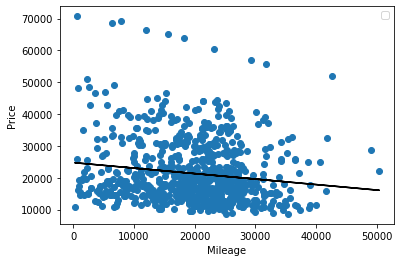

In [17]:
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.legend()
plt.show()

Нужно что-то поумнее

In [20]:
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', 'Make']])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221.0,3.1,1,0,0,0,0,0
1,9135.0,3.1,1,0,0,0,0,0
2,13196.0,3.1,1,0,0,0,0,0
3,16342.0,3.1,1,0,0,0,0,0
4,19832.0,3.1,1,0,0,0,0,0


In [21]:
X.columns

Index(['Mileage', 'Liter', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn'],
      dtype='object')

In [25]:
Y = data.loc[ :, ['Price'] ]
Y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [26]:
model = LinearRegression()

In [32]:
model.fit(X, Y)
y_predict = model.predict(X)

Попробуем нарисовать как расходится факт с предсказаниями

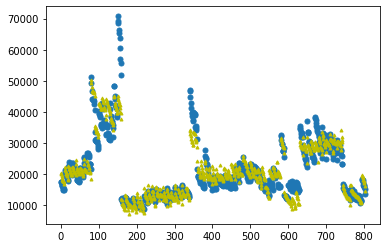

In [33]:
plt.plot(Y.index, Y, 'o', markersize = 5)
plt.plot(Y.index, y_predict, 'y^', markersize = 3)
plt.show()

In [29]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'score',
 'set_params']

In [34]:
model.intercept_

array([11962.59259628])

In [39]:
list(X.columns)

['Mileage',
 'Liter',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Pontiac',
 'Make_SAAB',
 'Make_Saturn']

In [36]:
model.coef_

array([[-1.78102452e-01,  4.79073034e+03, -5.05523389e+03,
         1.13220748e+04, -5.77769259e+03, -5.91884538e+03,
         1.09700059e+04, -5.54030890e+03]])

In [40]:
list(zip(list(X.columns), model.coef_[0]))

[('Mileage', -0.17810245171195566),
 ('Liter', 4790.730339615705),
 ('Make_Buick', -5055.2338879998115),
 ('Make_Cadillac', 11322.07482600929),
 ('Make_Chevrolet', -5777.692586696304),
 ('Make_Pontiac', -5918.845380797684),
 ('Make_SAAB', 10970.005925370722),
 ('Make_Saturn', -5540.3088958862045)]

In [24]:
X.columns

Index(['Mileage', 'Liter', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn'],
      dtype='object')